# Minibatch를 입력받는 Linear Regression 구현

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn')

# set params
N, n_feature = 300, 5
lr = 0.03
epochs = 30
b_size = 32   # batch size

t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

n_batch = N // b_size

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b

J_track = list()
W_track, b_track = list(), list()
for epoch in range(epochs):
  for b_idx in range(n_batch):
    W_track.append(W)
    b_track.append(b)

    # get minibatch
    X = x_data[b_idx*b_size : (b_idx+1)*b_size, ...]
    Y = y_data[b_idx*b_size : (b_idx+1)*b_size, ...]

    # forward propagation
    Pred = X @ W + b
    J0 = (Y - Pred)**2
    J = np.mean(J0)
    J_track.append(J)

    # jacobians
    dJ_dJ0 = 1/b_size*np.ones((1,b_size))
    dJ0_dPred = np.diag(-2*(Y - Pred).flatten())
    dPred_dW = X
    dPred_db = np.ones((b_size,1))

    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dW = dJ_dPred @ dPred_dW
    dJ_db = dJ_dPred @ dPred_db

    # parameter update
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db

W_track = np.hstack(W_track)
b_track = np.concatenate(b_track)

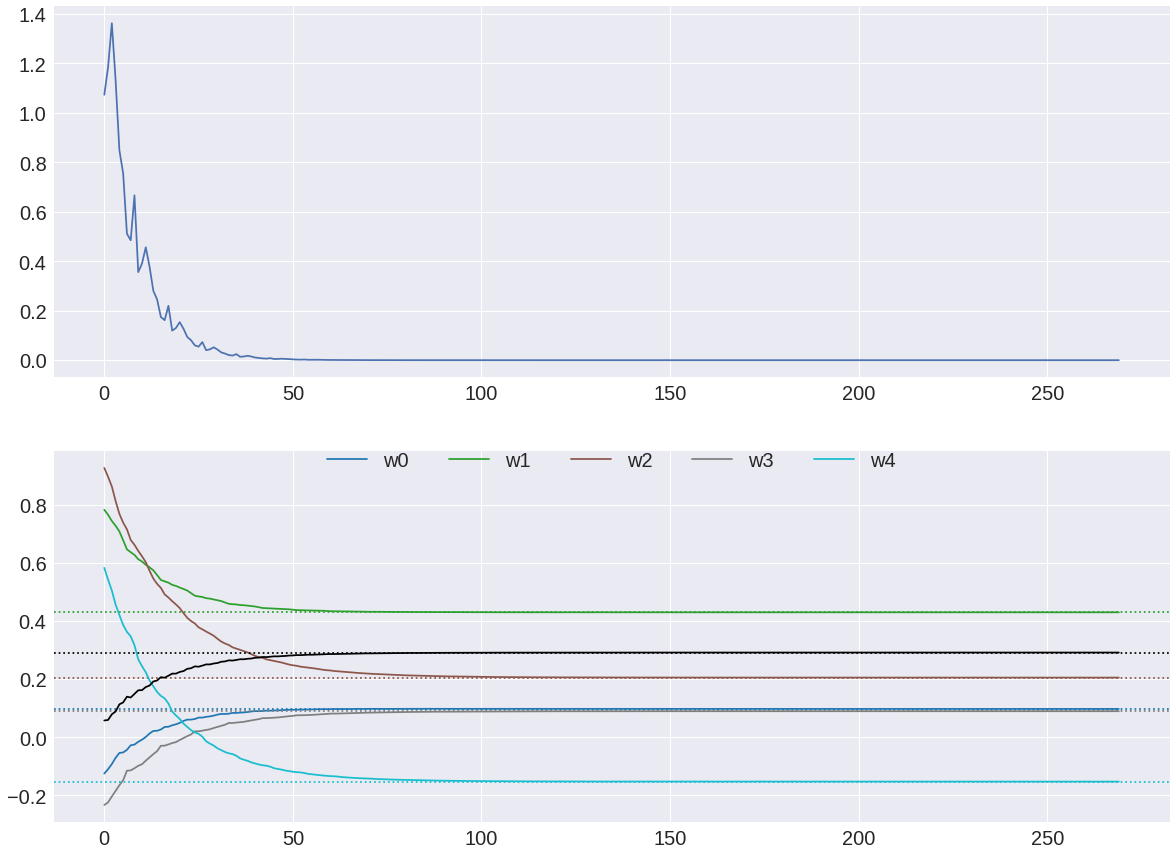

In [28]:
# visualize results
cmap = cm.get_cmap('tab10', n_feature)
fig, axes = plt.subplots(2, 1, figsize=(20, 15))
axes[0].plot(J_track)

for w_idx, (t_w, w_track) in enumerate(zip(t_W, W_track)):
  axes[1].axhline(y=t_w, linestyle=':', color=cmap(w_idx))
  axes[1].plot(w_track, color=cmap(w_idx), label='w'+str(w_idx))

axes[1].axhline(y=t_b, linestyle=':', color='black')
axes[1].plot(b_track, color='black')
axes[1].legend(fontsize=20, loc='lower center',
               bbox_to_anchor=(0.5, 0.9), ncol=n_feature)
axes[0].tick_params(labelsize=20)
axes[1].tick_params(labelsize=20)